In [1]:
from __future__ import division, print_function

from IPython.core.display import Image
from IPython.display import YouTubeVideo

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Machine Vision + Neural Nets

Week 9 | Day 2

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Explain what visual bag of words is
- Explain how images features are generated
- Describe what a perceptron is and how it works
- Explain how deep learning models are constructed
- Build a system that utilizes transfer learning/deep features to find similar images

## Opening

Today we're going to talk about computer vision, so let's start by looking at a few applications.

## XBox Kinect

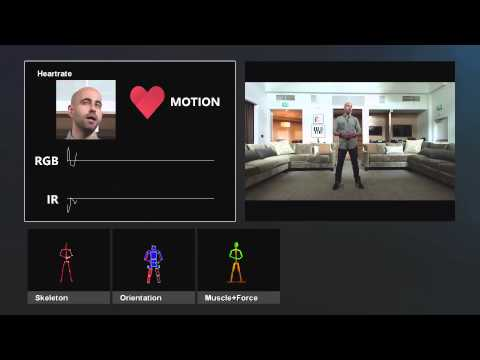

In [10]:
YouTubeVideo("ECnaCYnQBMQ", height=650, width=900)

## Self- Driving Cars

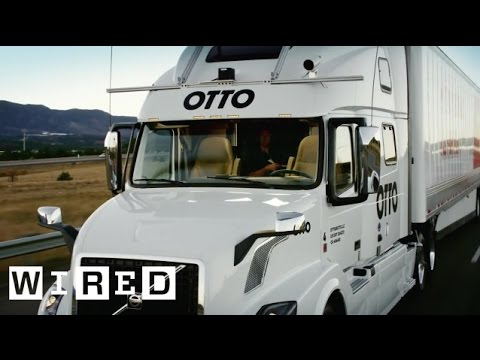

In [12]:
YouTubeVideo("sIlCR4eG8_o", height=650, width=900)

## Aside...
<img src="http://i.imgur.com/3xeQUEW.png">

## Facial Recognition

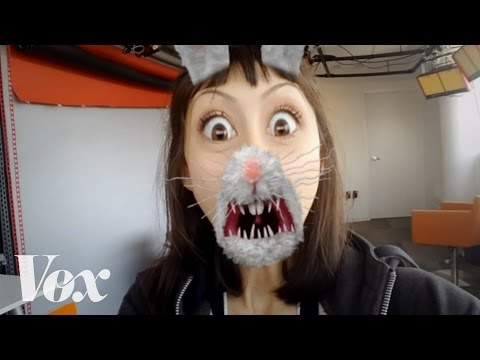

In [14]:
YouTubeVideo("Pc2aJxnmzh0", height=650, width=900)

## Image Data

Up until this point in the course, we have worked with either columns of numbers or with text. Today we are going to learn how to work with images. Though they may seem like they would be far more complicated to work with, they are just as simple as any other medium we've worked with. In fact, image recognition shares a great deal with natural language processing.

So let's talk about what we might need to do to an image to use machine learning on it.

## Check: What are some concerns we might have to address when working with images?

So let's now look at how we might deal with some of these issues

## Working with images

Our first problem is how to convert our image into a machine readable format.

**How might we go about doing that for images?**

## Basic Image Features

Since images are nothing more than a grid of pixels, we can represent the images as a matrix of the same size where each pixel corresponds to a cell in our matrix. For a greyscale image, the value would represent the intensity of the pixel. For example, typically a value 0 to 16 is used where 0 is pure white and 16 is solid black with the in-between values representing increasingly darker shades of gray.

If we wanted to represent a color picture, we could use 3 features for each pixel. These would then be the RGB value for each.

## MNIST Digits

Let's now look at the 'hello world' of image recognition, the MNIST digits data set. This is a large data set of handwritten digits. This data set is frequently used for image recognition tasks.

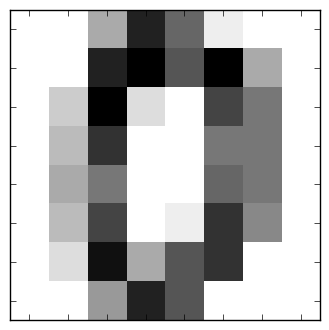

In [2]:
from sklearn import datasets

digits = datasets.load_digits()

def display_img(img_no):
    fig, ax = plt.subplots()
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.matshow(digits.images[img_no], cmap = plt.cm.binary);

display_img(0)

### We can see the matrix representation with the following code:

In [3]:
digits.images[0].shape

(8, 8)

In [23]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

## Exercise: 

Try displaying an image from the MNIST data set and then visualizing it both as an image and also as a matrix.

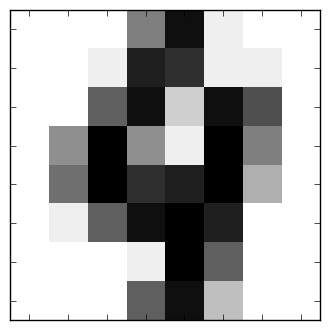

In [4]:
display_img(14)

In [5]:
digits.images[14].shape

(8, 8)

In [6]:
digits.images[14]

array([[  0.,   0.,   0.,   8.,  15.,   1.,   0.,   0.],
       [  0.,   0.,   1.,  14.,  13.,   1.,   1.,   0.],
       [  0.,   0.,  10.,  15.,   3.,  15.,  11.,   0.],
       [  0.,   7.,  16.,   7.,   1.,  16.,   8.,   0.],
       [  0.,   9.,  16.,  13.,  14.,  16.,   5.,   0.],
       [  0.,   1.,  10.,  15.,  16.,  14.,   0.,   0.],
       [  0.,   0.,   0.,   1.,  16.,  10.,   0.,   0.],
       [  0.,   0.,   0.,  10.,  15.,   4.,   0.,   0.]])

## Finding the most similar image

When we work with text document, the most common way to find the most similar documents is by calculating the tf-idf score for each word in the corpus and then taking the cosine similarity between each of the pairs. We can do the same thing for images.

Note: While cosine similarity works well here, typically in machine vision tasks, something called a Chi-squared kernel is used vs. cosine similarity which is the preferred choice in language-based tasks. Why use one vs. the other? Simply because they have proven over time to work better in their respective domains.

## Exercise:

Using the image you loaded previously, use the cosing_similarity library to find the top 5 most similar digits to that one. You can use the display_img() function to visualize them. 

Bonus: Find the opposite of 0 (the least similar image to a zero)

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

# solution
X = digits.data
co_sim = cosine_similarity(X[0].reshape(1,-1), X) #reshape for sklearn
cosf = pd.DataFrame(co_sim).T
cosf.columns = ['similarity']
cosf.sort_values('similarity', ascending=False).head()

,similarity
0,1.000000
877,0.980739
464,0.974474
1365,0.974188
1541,0.971831


In [2]:
# solution
# display_img()

## Feature generation and representation

So far we've seen that we can use pixel-level features in our models, but surely this can't be enough for more advanced computer vision applications like object detection, right? Precisely. We need to incorporate features that capture a higher level abstraction of these pixel features alone.

## Many ways to do this


- Rectangular grid

<img src="http://i.imgur.com/nBFRit0.png">


## Many ways to do this

- Interest point detection

<img src="http://i.imgur.com/6jowWer.png">

## State of the art

The idea here is that we identify the most salient points in an image in some manner. These are also called our keypoints. These points are then transformed/normalized so that they are invariant to scale and rotation. (SIFT)

<img src="http://i.imgur.com/F0sk23E.png">

## Codebook

After this step, the image is a collection of vectors for each keypoint descriptor in the image. Then next step is to generate a codebook from these vectors using something like k-means. This codebook forms a visual vocabulary much like we use a word vocabulary in NLP. Codewords are the centers of the clusters.

This can be illustrated with an example using textures. Here we have a number of textures.

<img src="http://i.imgur.com/wZ2dXIw.png">

Each can be represented as a repeating series of textural units.

<img src="http://i.imgur.com/2rqFmh6.png">

Each texture then is a historgram over these texutral units or textrons:
    
<img src="http://i.imgur.com/gnzqChC.png">

## Visual Bag of Words

Finally, images can be classified using these features. Notice this process dispenses with spatial positioning of these features in the same manner that NLP does in bag-of-words processing. For this reason, this method is known as visual bag of words.

Typically the next step involves the use of SVMs. Until recently this was state-of-the-art. Today, however, deep learning has taken over the top stop for visual tasks.

<img src="http://i.imgur.com/wZQtUo6.png">

## Neural Networks

Deep learning is the most recent (and most advanced) incarnation of neural networks. To understand what a neural network is we need to first understand the basic building block of these networks: the perceptron.

Perceptrons date back to the 1950s. They were an attempt to adopt the biological model of the brain to computers. There first application was, naturally, image recognition.

## The Perceptron

Recalling your high school biology, neurons work in the following way.

- Each neuron is connected in a network to many other neurons
- These neurons both send and receive signals from connected neurons
- When a neuron receives a signal it can either fire or not depending on whether the incoming signal is above some threshold

A single perceptron then, like a neuron, can be thought of a decision-making unit. If the weight of the incoming signals is above the threshold, the perceptron fires, if not it doesn't. In this case firing equals outputting a value of 1 and not firing equals outputting a value of 0.

<img src="http://i.imgur.com/ow7SExS.png" width=500>
<br>
<img src="http://i.imgur.com/h0QzhKs.png" widht=500>

## Decision process

As a example, imagine you are considering taking a new job. There are several factors that go into the decision, things like the location, the pay, the work, the hip-ness of the office. Obviously, not all of these carry the same weight when making your decision. In the perceptron, each input then is modified by a weighting factor. If the incoming values are greater than the threshold the unit outputs a 1, if not, it outputs a 0.

## Example

Let's now see how learning can take place with a perceptron. We will train a perceptron with two inputs to learn an AND rule. That is we want the perceptron to output a 1 when both inputs are 1, and a 0 in all other cases.

Let's now begin our learning process. Our X1 input is equal to 1 and our X2 input is equal to -1. W1 is randomly set to 0.8, and W2 is randomly set to 0.2. As both must be positive for our output to be 1, then our threshold is any value greater than 1.

Therefore, we have W1*X1 + W2X2 = as 1 * 0.8 + -1 * 0.4 = 0.8 – 0.4 = 0.4.

Now, since we expect our output to be 0, we can say that we have an error of 0.4. We will now attempt to improve our model by pushing these errors back down to the inputs in order to update the weights.

## Update rule

<img src="http://i.imgur.com/VEOlmoC.png">

Here, wi is the weight of the ith input, t is the target outcome, and 0 is the actual outcome. In our case, our target outcome is 0, and our actual outcome is 0.4. Ignore the n term for now. This is the learning rate. It determines how large or small our updates should be. For now, we will assume it is set to 1.

Let's look at X1 to update its weight. Therefore, we have 1 * (0 – 0.4) * 1, which equals -0.4. That is our w delta; therefore, updating equation 1, we have 0.8 – 0.4, which gives us our new weight for W1 as 0.4. Therefore, the weight for X1 has come down. What about the weight for X2? Let's take a look. That one is 1 * (0 – 0.4) * -1, which equals 0.4. Updating the weight, we have 0.2 + 0.4 = 0.6. Notice the weights are converging to parity which is what we would expect.


## Perceptron as the fundamental building block of deep nets

This ultra-simple model is the fundamental building block of today's deep learning algorithms. Many advancements have been applied over the years, such as changing the activation functions and adding hidden layers (layers between the input layers and output layers), but fundamentally, these perceptrons have been built upon to produce the deep learning neural networks used today.

<img src="http://i.imgur.com/Px5R6ir.png">

## Image similarity with deep features

Now that we've learned a bit about computer vision applications, feature extraction, and the building blocks of deep learning, let's use a pre-trained deep learning network to find the image most similar to ourselves in the CIFAR-10 image database.

We will first need to make sure GraphLab Create is installed. This is a platform that makes large-scale (distributed) learning possible with a very simple API. Fortunately for us, it is available free for a one year period for students (bootcamps included).

Follow these directions to get it installed: https://turi.com/download/install-graphlab-create-command-line.html

Once that is completed, we can begin our code in our Jupyter notebook.

## Getting started with GraphLab Create

In [11]:
import graphlab
graphlab.canvas.set_target('ipynb')

# load pre-trained model
gl_img = graphlab.SFrame('http://s3.amazonaws.com/dato-datasets/coursera/deep_learning/image_train_data')
gl_img

This non-commercial license of GraphLab Create for academic use is assigned to sarafina82@gmail.com and will expire on November 15, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1479228270.log


Downloading http://s3.amazonaws.com/dato-datasets/coursera/deep_learning/image_train_data/dir_archive.ini to /var/tmp/graphlab-macbook/501/b414835a-afb0-45d0-bdd7-6daf46fb2139.ini

Downloading http://s3.amazonaws.com/dato-datasets/coursera/deep_learning/image_train_data/objects.bin to /var/tmp/graphlab-macbook/501/3ff6fb6f-767a-4acd-8a17-1fd0479e724e.bin

Downloading http://s3.amazonaws.com/dato-datasets/coursera/deep_learning/image_train_data/m_8b0619884fada761.frame_idx to /var/tmp/graphlab-macbook/501/6cf72ccc-04b8-4ff0-a34e-51e75a3cae75.frame_idx

Downloading http://s3.amazonaws.com/dato-datasets/coursera/deep_learning/image_train_data/m_8b0619884fada761.sidx to /var/tmp/graphlab-macbook/501/e3574b86-b9ee-455b-8711-ade9e5aaeb34.sidx

Downloading http://s3.amazonaws.com/dato-datasets/coursera/deep_learning/image_train_data/m_8b0619884fada761.0000 to /var/tmp/graphlab-macbook/501/afa47b53-0b43-42d0-9a43-09011867fc04.0000

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.242871761322,1.09545373917, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.525087952614, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.566015958786, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.12979578972, 0.0, 0.0,0.778194487095, 0.0, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.71786928177, 0.0, 0.0,0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.57818555832, 0.0, 0.0,0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.220677852631, 0.0, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0, 0.23753464222, 0.0,0.0, 0.0, 0.0, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.5737862587, 0.0, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.658935725689, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


In [28]:
import graphlab
graphlab.canvas.set_target('ipynb')

# load pre-trained model
gl_img = graphlab.SFrame('http://s3.amazonaws.com/dato-datasets/coursera/deep_learning/image_train_data')
gl_img

This non-commercial license of GraphLab Create for academic use is assigned to alex.combs@generalassemb.ly and will expire on August 15, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1479208202.log


Downloading http://s3.amazonaws.com/dato-datasets/coursera/deep_learning/image_train_data/dir_archive.ini to /var/tmp/graphlab-ac/22641/0aea7497-e468-4923-a6b6-6030e12a4c22.ini

Downloading http://s3.amazonaws.com/dato-datasets/coursera/deep_learning/image_train_data/objects.bin to /var/tmp/graphlab-ac/22641/3348343d-9fbe-40aa-abaa-1f6764a08418.bin

Downloading http://s3.amazonaws.com/dato-datasets/coursera/deep_learning/image_train_data/m_8b0619884fada761.frame_idx to /var/tmp/graphlab-ac/22641/e0e33d54-6d27-4b6a-a35d-40357cc59799.frame_idx

Downloading http://s3.amazonaws.com/dato-datasets/coursera/deep_learning/image_train_data/m_8b0619884fada761.sidx to /var/tmp/graphlab-ac/22641/504a351a-d949-4559-9949-37ecbca7823c.sidx

Downloading http://s3.amazonaws.com/dato-datasets/coursera/deep_learning/image_train_data/m_8b0619884fada761.0000 to /var/tmp/graphlab-ac/22641/4de76591-5740-4cee-b4a1-49e7fb058450.0000

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.242871761322,1.09545373917, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.525087952614, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.566015958786, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.12979578972, 0.0, 0.0,0.778194487095, 0.0, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.71786928177, 0.0, 0.0,0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.57818555832, 0.0, 0.0,0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.220677852631, 0.0, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0, 0.23753464222, 0.0,0.0, 0.0, 0.0, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.5737862587, 0.0, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.658935725689, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


In this DataFrame, we have a number of columns describing the images, but we are primarily concerned with the deep_features column. These are features that were learned from a deep learning neural network. They won't make any sense to you, but they are the learned features that discriminate from the various classes of images in the CIFAR-10 data set. We are going to use something called transfer learning to allow us to use these deep features for our own purposes.

Because each layer of a network can be thought of as a progressively more holistic representation of the trained object, we can 'cut off the head' of the network (so to speak) and use it to extract lower-level features to apply on our own images.

<img src="http://i.imgur.com/p3vKsAo.png" width=700>>

## We can look at the first 5 in the dataset

In [12]:
graphlab.image_analysis.resize(gl_img['image'][:5], 128,128).show()

## Next we can pull in our own image

In [14]:
img = graphlab.Image('https://media.licdn.com/mpr/mpr/shrinknp_400_400/AAEAAQAAAAAAAAihAAAAJDhlYTcwNDI1LTIzNmMtNGMwNi05ZDFjLWIzZDBkYjVjYjlmYg.jpg')
ppsf = graphlab.SArray([img])
ppsf = graphlab.image_analysis.resize(ppsf, 32,32)
graphlab.image_analysis.resize(ppsf, 128,128).show()

Downloading https://media.licdn.com/mpr/mpr/shrinknp_400_400/AAEAAQAAAAAAAAihAAAAJDhlYTcwNDI1LTIzNmMtNGMwNi05ZDFjLWIzZDBkYjVjYjlmYg.jpg to /var/tmp/graphlab-macbook/501/496f12f6-101b-4a43-b6c7-c49e85d299ee.jpg

In [15]:
ppsf = graphlab.SFrame(ppsf).rename({'X1': 'image'})
ppsf

image
Height: 32 Width: 32


## Next we need to extract the deep features from our image

In [16]:
extractor = graphlab.feature_engineering.DeepFeatureExtractor(features='image', model='auto')
extractor = extractor.fit(ppsf)
ppsf['deep_features'] = extractor.transform(ppsf)['deep_features.image']
ppsf

Downloading https://static.turi.com/products/graphlab-create/resources/models/python2.7/imagenet_model_iter45/dir_archive.ini to /var/tmp/graphlab-macbook/501/92bdce4d-5d1f-4ce9-a404-6100ff556a45.ini

Downloading https://static.turi.com/products/graphlab-create/resources/models/python2.7/imagenet_model_iter45/objects.bin to /var/tmp/graphlab-macbook/501/4df51964-4079-4857-bb0d-6f761a6bfaf5.bin

Images being resized.

image,deep_features
Height: 32 Width: 32,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.42576885223, 0.0, ..."


## Then we append it to our SFrame

In [17]:
ppsf['label'] = 'me'
gl_img['id'].max()

ppsf['id'] = 50000
labels = ['id', 'image', 'label', 'deep_features']
part_train = gl_img[labels]
new_train = part_train.append(ppsf[labels])
new_train.tail()

id,image,label,deep_features
49840,Height: 32 Width: 32,cat,"[0.0344250798225, 0.0,0.0, 0.0, 0.0, 0.0, ..."
49845,Height: 32 Width: 32,dog,"[0.125242829323, 0.0,0.0, 0.0, 0.0, 0.0, ..."
49881,Height: 32 Width: 32,bird,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 9.30746841431, 0.0, ..."
49896,Height: 32 Width: 32,cat,"[0.0, 0.0,0.592454433441, 0.0, ..."
49913,Height: 32 Width: 32,automobile,"[1.2023819685,0.342965483665, 0.0, ..."
49919,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0,0.769036352634, 0.0, ..."
49927,Height: 32 Width: 32,dog,"[0.558163285255, 0.0,1.05110442638, 0.0, 0.0, ..."
49958,Height: 32 Width: 32,cat,"[0.674960494041, 0.0,0.0, 1.9640891552, ..."
49970,Height: 32 Width: 32,cat,"[1.07501864433, 0.0, 0.0,0.0, 0.0, 0.0, ..."
50000,Height: 32 Width: 32,me,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.42576885223, 0.0, ..."


## Now we use knn to find our spirit animal

In [18]:
knn_model = graphlab.nearest_neighbors.create(new_train, features=['deep_features'], label='id')

me_test = new_train[-1:]
def reveal_my_twin(x):
    return gl_img.filter_by(x['reference_label'],'id')

spirit_animal = reveal_my_twin(knn_model.query(me_test))
graphlab.image_analysis.resize(spirit_animal['image'], 128,128).show()

Starting brute force nearest neighbors model training.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498504   | 18.289ms     |

| Done         |         | 100         | 164.93ms     |

+--------------+---------+-------------+--------------+

In [25]:
imgfat = graphlab.Image('fatty.jpg')
ppsf = graphlab.SArray([img])
ppsf = graphlab.image_analysis.resize(ppsf, 32,32)
graphlab.image_analysis.resize(ppsf, 128,128).show()

ToolkitError: Cannot open /Users/macbook/GA-DSI/curriculum/week-09/2.1-computer-vision/fatty.jpg for read. Cannot open /Users/macbook/GA-DSI/curriculum/week-09/2.1-computer-vision/fatty.jpg for reading: unspecified iostream_category error: unspecified iostream_category error

## Independent Exercise

Using the code samples, you've seen above, use the deep features on your own images to find the most similar images.

## Conclusion

In this lesson, we learned about computer vision applications; some of the basic concepts in working with computer vision; the basics of neural networks, deep learning, and transfer learning; and finally we used deep features to find the image most similar to our own in the CIFAR-10 data set.

## Additional Materials

- [Stanford lecture of VBoW](http://vision.stanford.edu/teaching/cs231a_autumn1112/lecture/lecture15_bow_part-based_cs231a_marked.pdf)
- [Udacity Computer Vision](https://www.udacity.com/course/introduction-to-computer-vision--ud810)
- [Turi API Docs](https://turi.com/learn/userguide/index.html)